In [75]:
import pandas as pd
import numpy as np
import glob
import time,datetime
import matplotlib.pyplot as plt
import re

# 批量读入csv并生成一个文件

In [80]:
for r in glob.glob("JC-20170*-citibike-tripdata.csv"):
    csv = pd.read_csv(r)
    csv.to_csv('JC-2017-citibike-tripdata.csv',mode = 'a+',header = False)

In [88]:
cb = pd.read_csv('JC-2017-citibike-tripdata.csv',names = [ 'Trip Duration', 'Start Time', 'Stop Time',
       'Start Station ID', 'Start Station Name', 'Start Station Latitude',
       'Start Station Longitude', 'End Station ID', 'End Station Name',
       'End Station Latitude', 'End Station Longitude', 'Bike ID', 'User Type',
       'Birth Year', 'Gender'])

In [96]:
cb.shape

(151938, 15)

In [97]:
cb.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,148,2017-01-01 00:21:32,2017-01-01 00:24:01,3276,Marin Light Rail,40.714584,-74.042817,3185,City Hall,40.717732,-74.043845,24575,Subscriber,1983.0,1
1,1283,2017-01-01 00:24:35,2017-01-01 00:45:58,3183,Exchange Place,40.716247,-74.033459,3198,Heights Elevator,40.748716,-74.040443,24723,Subscriber,1978.0,1
2,372,2017-01-01 00:38:19,2017-01-01 00:44:31,3183,Exchange Place,40.716247,-74.033459,3211,Newark Ave,40.721525,-74.046305,24620,Subscriber,1989.0,1
3,1513,2017-01-01 00:38:37,2017-01-01 01:03:50,3194,McGinley Square,40.725340,-74.067622,3271,Danforth Light Rail,40.692640,-74.088012,24668,Subscriber,1961.0,1
4,639,2017-01-01 01:47:52,2017-01-01 01:58:31,3183,Exchange Place,40.716247,-74.033459,3203,Hamilton Park,40.727596,-74.044247,26167,Subscriber,1993.0,1


In [98]:
cb.columns

Index(['Trip Duration', 'Start Time', 'Stop Time', 'Start Station ID',
       'Start Station Name', 'Start Station Latitude',
       'Start Station Longitude', 'End Station ID', 'End Station Name',
       'End Station Latitude', 'End Station Longitude', 'Bike ID', 'User Type',
       'Birth Year', 'Gender'],
      dtype='object')

# 15万次骑行

In [99]:
cb.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,148,2017-01-01 00:21:32,2017-01-01 00:24:01,3276,Marin Light Rail,40.714584,-74.042817,3185,City Hall,40.717732,-74.043845,24575,Subscriber,1983.0,1
1,1283,2017-01-01 00:24:35,2017-01-01 00:45:58,3183,Exchange Place,40.716247,-74.033459,3198,Heights Elevator,40.748716,-74.040443,24723,Subscriber,1978.0,1
2,372,2017-01-01 00:38:19,2017-01-01 00:44:31,3183,Exchange Place,40.716247,-74.033459,3211,Newark Ave,40.721525,-74.046305,24620,Subscriber,1989.0,1
3,1513,2017-01-01 00:38:37,2017-01-01 01:03:50,3194,McGinley Square,40.725340,-74.067622,3271,Danforth Light Rail,40.692640,-74.088012,24668,Subscriber,1961.0,1
4,639,2017-01-01 01:47:52,2017-01-01 01:58:31,3183,Exchange Place,40.716247,-74.033459,3203,Hamilton Park,40.727596,-74.044247,26167,Subscriber,1993.0,1


## 租赁点统计

In [100]:
cb['Start Station Name'].unique()

array(['Marin Light Rail', 'Exchange Place', 'McGinley Square',
       'Grove St PATH', 'Jersey & 6th St', 'Liberty Light Rail',
       'Christ Hospital', 'Van Vorst Park', 'Newport PATH', 'Warren St',
       'Hamilton Park', 'Columbus Drive', 'Sip Ave', 'Leonard Gordon Park',
       'Riverview Park', 'Newark Ave', 'Morris Canal', 'Pershing Field',
       'Jersey & 3rd', 'Dixon Mills', 'Baldwin at Montgomery',
       'Brunswick & 6th', 'Monmouth and 6th', 'Lincoln Park',
       'Garfield Ave Station', 'Essex Light Rail', 'Hilltop',
       'Manila & 1st', 'Astor Place', 'Brunswick St', 'Newport Pkwy',
       'Paulus Hook', 'City Hall', 'Oakland Ave', 'JC Medical Center',
       'Union St', '5 Corners Library', 'Dey St', 'West Side Light Rail',
       'Danforth Light Rail', 'North St', 'Communipaw & Berry Lane',
       'Heights Elevator', 'Central Ave', 'Lafayette Park',
       'Columbia Park', 'NJCU', 'MLK Light Rail', 'Bethune Center',
       'Bayside Park', 'JCBS Depot'], dtype=object

In [101]:
len(cb['Start Station Name'].unique())

51

## 自行车数量

In [102]:
len(cb['Bike ID'].unique())

885

## 骑行次数计数

In [103]:
cb['Start Time'].count()

151938

## 每辆自行车租借频率

In [104]:
cb['Bike ID'].count()/len(cb['Bike ID'].unique())

171.68135593220339

## 每辆自行车每日租借频率

In [105]:
cb['Bike ID'].count()/len(cb['Bike ID'].unique())/200   #假设1-7月有200天

0.85840677966101697

## 每次租借平均时长（分钟）

In [107]:
cb['Trip Duration'].sum()/cb['Bike ID'].count()/60

13.447783086960909

# 按月汇总

In [108]:
cb.columns

Index(['Trip Duration', 'Start Time', 'Stop Time', 'Start Station ID',
       'Start Station Name', 'Start Station Latitude',
       'Start Station Longitude', 'End Station ID', 'End Station Name',
       'End Station Latitude', 'End Station Longitude', 'Bike ID', 'User Type',
       'Birth Year', 'Gender'],
      dtype='object')

## 对Start Time设置日期格式

In [109]:
cb['Start Time'] = pd.to_datetime(cb['Start Time'])

In [112]:
cb = cb.set_index('Start Time')

## 按月对骑行数据进行计数

In [114]:
cb_month = cb.resample('M').apply(len) 

## 提取汇总后的Bike ID字段

In [116]:
group_cb_month = cb_month['Bike ID']

In [127]:
group_cb_month

Start Time
2017-01-31    12926
2017-02-28    14026
2017-03-31    12201
2017-04-30    21186
2017-05-31    25966
2017-06-30    32060
2017-07-31    33573
Freq: M, Name: Bike ID, dtype: int64

## (error) 汇总按月汇总的骑行次数折线图 

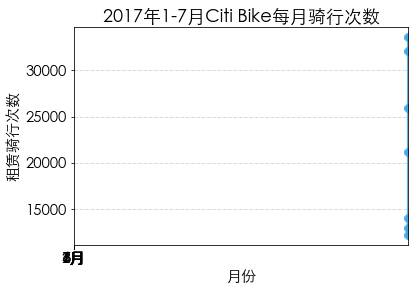

In [128]:
plt.rc('font', family='STXihei', size=15) 
a=np.array([1,2,3,4,5,6,7]) 
#plt.plot(group_cb_month,'g8',group_cb_month,'g-',color='#39A2E1', linewidth=3,markeredgewidth=3,markeredgecolor='#39A2E1',alpha=0.8 ) 
plt.xlabel('月份') 
plt.ylabel('租赁骑行次数') 
plt.title('2017年1-7月Citi Bike每月骑行次数') 
plt.grid( color='#95a5a6',linestyle='--', linewidth=1 ,axis='y',alpha=0.4) 
plt.xticks(a, ('1月','2月','3月','4月','5月','6月','7月') ) 
plt.show()

# 按季度汇总

In [129]:
cb_quarterly = cb.resample('Q').apply(len)

In [130]:
cb_quarterly

,Trip Duration,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
Start Time,,,,,,,,,,,,,,
2017-03-31,39153,39153,39153,39153,39153.0,39153.0,39153,39153,39153.0,39153.0,39153,39153,39153.0,39153
2017-06-30,79212,79212,79212,79212,79212.0,79212.0,79212,79212,79212.0,79212.0,79212,79212,79212.0,79212
2017-09-30,33573,33573,33573,33573,33573.0,33573.0,33573,33573,33573.0,33573.0,33573,33573,33573.0,33573


In [131]:
group_cb_quarterly = cb_quarterly['Bike ID']

In [132]:
group_cb_quarterly

Start Time
2017-03-31    39153
2017-06-30    79212
2017-09-30    33573
Freq: Q-DEC, Name: Bike ID, dtype: int64

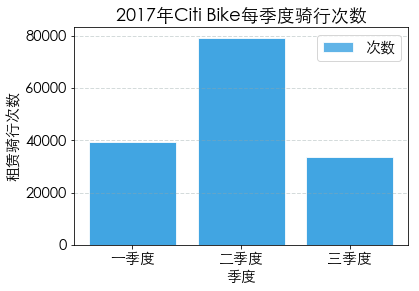

In [134]:
plt.rc('font',family = 'STXihei',size = 15)
a = np.array([1,2,3])
plt.bar([1,2,3],group_cb_quarterly,color = '#39A2E1',alpha = 0.8,align = 'center',edgecolor = 'white')
plt.xlabel('季度')
plt.ylabel('租赁骑行次数')
plt.title('2017年Citi Bike每季度骑行次数')
plt.legend(['次数'],loc = 'upper right')
plt.grid(color = '#95a5a6',linestyle = '--',linewidth=1,axis = 'y',alpha = 0.4)
plt.xticks(a,('一季度','二季度','三季度'))
plt.show()

# 哪些人在使用Citi Bike

## 性别占比

In [135]:
user_gender = cb.groupby('Gender')['Bike ID'].agg(len)/cb['Bike ID'].count() * 100

In [136]:
user_gender

Gender
0     7.707749
1    71.953033
2    20.339217
Name: Bike ID, dtype: float64

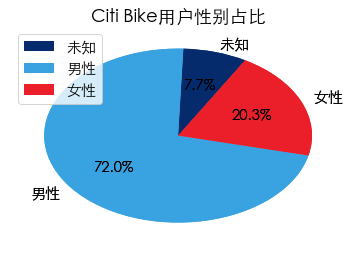

In [138]:
plt.rc('font',family='STXihei',size = 15)
colors = ['#052B6C','#39A2E1','#EA1F29']
name = ['未知','男性','女性']
plt.pie(user_gender,labels=name,colors=colors,explode=(0,0,0),startangle=60,autopct = '%1.1f%%')
plt.title('Citi Bike用户性别占比')
plt.legend(['未知','男性','女性'],loc='upper left')
plt.show()

## 30~50岁用户热衷骑行

In [139]:
cb.head()

,Trip Duration,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
Start Time,,,,,,,,,,,,,,
2017-01-01 00:21:32,148,2017-01-01 00:24:01,3276,Marin Light Rail,40.714584,-74.042817,3185,City Hall,40.717732,-74.043845,24575,Subscriber,1983.0,1
2017-01-01 00:24:35,1283,2017-01-01 00:45:58,3183,Exchange Place,40.716247,-74.033459,3198,Heights Elevator,40.748716,-74.040443,24723,Subscriber,1978.0,1
2017-01-01 00:38:19,372,2017-01-01 00:44:31,3183,Exchange Place,40.716247,-74.033459,3211,Newark Ave,40.721525,-74.046305,24620,Subscriber,1989.0,1
2017-01-01 00:38:37,1513,2017-01-01 01:03:50,3194,McGinley Square,40.725340,-74.067622,3271,Danforth Light Rail,40.692640,-74.088012,24668,Subscriber,1961.0,1
2017-01-01 01:47:52,639,2017-01-01 01:58:31,3183,Exchange Place,40.716247,-74.033459,3203,Hamilton Park,40.727596,-74.044247,26167,Subscriber,1993.0,1


In [140]:
cb['Birth Year'].min(),cb['Birth Year'].max()

(1887.0, 2001.0)

### 计算用户年龄

In [141]:
cb['age'] = 2017-cb['Birth Year']
cb['age'].min(),cb['age'].max()

(16.0, 130.0)

### 对用户年龄进行分组

In [142]:
bins = [0,18,30,50,130]
group_age = ['少年','青年','中年','老年']
cb['group_age'] = pd.cut(cb['age'],bins,labels = group_age)

### 按年龄分组对数据进行汇总

In [143]:
user_age = cb.groupby('group_age')['group_age'].agg(len)

### 生成用户年龄分布柱状图

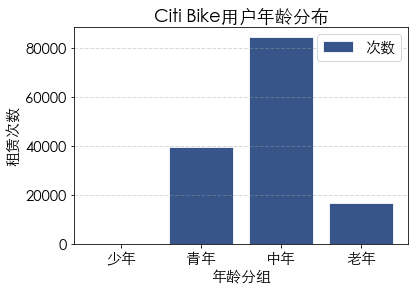

In [144]:
plt.rc('font',family='STXihei',size = 15)
a = np.array([1,2,3,4])
plt.bar([1,2,3,4],user_age,color = '#052B6C',alpha = 0.8,align = 'center',edgecolor ='white')
plt.xlabel('年龄分组')
plt.ylabel('租赁次数')
plt.title('Citi Bike用户年龄分布')
plt.legend(['次数'],loc='upper right')
plt.grid(color = '#95a5a6',linestyle='--',linewidth=1,axis ='y',alpha=0.4)
plt.xticks(a,('少年','青年','中年','老年'))
plt.show()

## 94.2%的用户为年费会员

1天和3天的会员统称为Customer，年度会 有成为Subscriber

In [145]:
user_type = cb.groupby('User Type')['Bike ID'].agg(len)/cb['Bike ID'].count() * 100

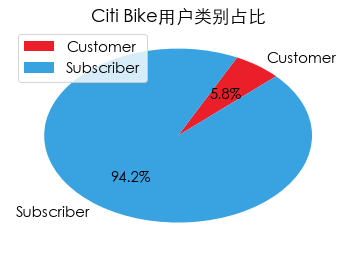

In [146]:
plt.rc('font',family = 'STXihei',size =15)
colors = ["#EA1F29","#39A2E1"]
name = ['Customer','Subscriber']
plt.pie(user_type,labels=name,colors = colors,explode=(0,0),startangle=43,autopct='%1.1f%%')
plt.title('Citi Bike用户类别占比')
plt.legend(['Customer','Subscriber'],loc='upper left')
plt.show()

# 用户骑行时间及速度

## 读取5月数据并创建数据表

In [147]:
cb5 = pd.read_csv('JC-201705-citibike-tripdata.csv')

In [150]:
cb5.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,347,2017-05-01 00:03:19,2017-05-01 00:09:06,3276,Marin Light Rail,40.714584,-74.042817,3214,Essex Light Rail,40.712774,-74.036486,26177,Subscriber,1958.0,1
1,108,2017-05-01 00:16:04,2017-05-01 00:17:53,3275,Columbus Drive,40.718355,-74.038914,3187,Warren St,40.721124,-74.038051,26266,Subscriber,1963.0,1
2,165,2017-05-01 00:29:59,2017-05-01 00:32:44,3267,Morris Canal,40.712419,-74.038526,3275,Columbus Drive,40.718355,-74.038914,26168,Subscriber,1988.0,1
3,289,2017-05-01 00:30:47,2017-05-01 00:35:36,3209,Brunswick St,40.724176,-74.050656,3205,JC Medical Center,40.716540,-74.049638,26273,Subscriber,1986.0,2
4,115,2017-05-01 00:41:14,2017-05-01 00:43:09,3185,City Hall,40.717733,-74.043845,3213,Van Vorst Park,40.718489,-74.047727,26293,Subscriber,1983.0,1


## 对Start Time进行分列

In [168]:
time_split = pd.DataFrame((x.split(' ') for x in cb5['starttime']),index = cb5.index,columns = ['start_date','start_time'])
time_split.head()

,start_date,start_time
start_time,,
2017-08-23 00:03:19,2017-05-01,00:03:19
2017-08-23 00:16:04,2017-05-01,00:16:04
2017-08-23 00:29:59,2017-05-01,00:29:59
2017-08-23 00:30:47,2017-05-01,00:30:47
2017-08-23 00:41:14,2017-05-01,00:41:14


In [169]:
cb5 = pd.merge(cb5,time_split,right_index = True,left_index = True)

In [170]:
cb5.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,usertype,birth year,gender,start_date_x,start_time_x,start_date_y,start_time_y,start_date_x,start_date_y,start_time
start_time,,,,,,,,,,,,,,,,,,,,,
2017-08-23 00:00:11,440,2017-05-12 00:00:11,2017-05-12 00:07:32,3269,Brunswick & 6th,40.726012,-74.050389,3269,Brunswick & 6th,40.726012,...,Subscriber,1981.0,1,2017-05-12,2017-08-23 00:00:11,2017-05-12,00:00:11,2017-05-12,2017-05-12,00:00:11
2017-08-23 00:00:31,646,2017-05-11 00:00:31,2017-05-11 00:11:17,3186,Grove St PATH,40.719586,-74.043117,3190,Garfield Ave Station,40.710467,...,Subscriber,1988.0,1,2017-05-11,2017-08-23 00:00:31,2017-05-11,00:00:31,2017-05-11,2017-05-11,00:00:31
2017-08-23 00:00:31,646,2017-05-11 00:00:31,2017-05-11 00:11:17,3186,Grove St PATH,40.719586,-74.043117,3190,Garfield Ave Station,40.710467,...,Subscriber,1988.0,1,2017-05-11,2017-08-23 00:00:31,2017-05-11,00:00:31,2017-05-11,2017-05-12,00:00:31
2017-08-23 00:00:31,158,2017-05-12 00:00:31,2017-05-12 00:03:10,3185,City Hall,40.717733,-74.043845,3276,Marin Light Rail,40.714584,...,Subscriber,1983.0,1,2017-05-12,2017-08-23 00:00:31,2017-05-12,00:00:31,2017-05-12,2017-05-11,00:00:31
2017-08-23 00:00:31,158,2017-05-12 00:00:31,2017-05-12 00:03:10,3185,City Hall,40.717733,-74.043845,3276,Marin Light Rail,40.714584,...,Subscriber,1983.0,1,2017-05-12,2017-08-23 00:00:31,2017-05-12,00:00:31,2017-05-12,2017-05-12,00:00:31


In [171]:
cb5['start_time'] = pd.to_datetime(cb5['start_time'])

In [172]:
cb5 = cb5.set_index('start_time')

In [173]:
start_hour = cb5.resample('H').apply(len)

In [174]:
start_hour.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,bikeid,usertype,birth year,gender,start_date_x,start_time_x,start_date_y,start_time_y,start_date_x,start_date_y
start_time,,,,,,,,,,,,,,,,,,,,,
2017-08-23 00:00:00,206,206,206,206,206,206,206,206,206,206,...,206,206,206,206,206,206,206,206,206,206
2017-08-23 01:00:00,115,115,115,115,115,115,115,115,115,115,...,115,115,115,115,115,115,115,115,115,115
2017-08-23 02:00:00,58,58,58,58,58,58,58,58,58,58,...,58,58,58,58,58,58,58,58,58,58
2017-08-23 03:00:00,34,34,34,34,34,34,34,34,34,34,...,34,34,34,34,34,34,34,34,34,34
2017-08-23 04:00:00,72,72,72,72,72,72,72,72,72,72,...,72,72,72,72,72,72,72,72,72,72


In [175]:
ride_hour = start_hour['bikeid']

## (error)绘制24小时折线图

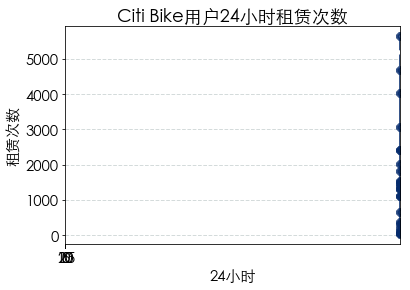

In [176]:
plt.rc('font',family = 'STXihei',size = 15)
a = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
#plt.plot(ride_hour,'8',ride_hour,'g--',color = '#052B6C',linewidth = 3,markeredgewidth = 3,markeredgecolor ='#052B6C',alpha = 0.8)
plt.xlabel('24小时')
plt.ylabel('租赁次数')
plt.title('Citi Bike用户24小时租赁次数')
plt.grid(color = '#95a5a6',linestyle = '--',linewidth = 1,axis = 'y',alpha = 0.4)
plt.xticks(a,('0','','','','','5','','','','','10','','','','',' 15','','','','','20','','','') )
plt.show()

## 对骑行时间进行分组

In [178]:
cb5['tripduration'].max()

1627331

In [179]:
bins = [0,300,600,1200,1800,2700,1627331]

In [180]:
group_tripduration = ['5分钟', '10分钟', '20分钟', '30分钟', '45分钟' , '更长时间'] 

In [181]:
cb5['group_tripduration'] = pd.cut(cb5['tripduration'], bins, labels=group_tripduration) 

In [182]:
group_minute=cb5.groupby('group_tripduration')['group_tripduration'].agg(len) 

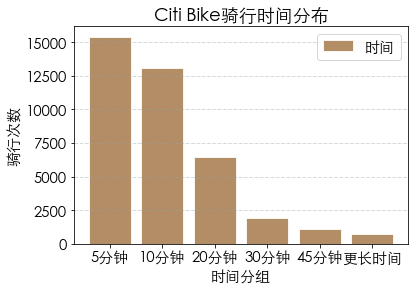

In [187]:
plt.rc('font', family='STXihei', size=15)
a=np.array([1,2,3,4,5,6]) 
plt.bar([1,2,3,4,5,6],group_minute,color='#9F713F',alpha=0.8,align='center',edgecolor='white') 
plt.xlabel('时间分组') 
plt.ylabel('骑行次数') 
plt.title('Citi Bike骑行时间分布') 
plt.legend(['时间'], loc='upper right') 
plt.grid(color='#95a5a6',linestyle='--', linewidth=1,axis='y',alpha=0.4) 
plt.xticks(a,('5分钟','10分钟','20分钟','30分钟', '45分钟','更长时间') ) 
plt.show()

## 平均骑行速度

In [188]:
from math import radians,cos,sin,asin,sqrt

### 通过经纬度计算距离的函数

In [190]:
def haversine(lon1,lat1,lon2,lat2):
    '''
    Calculate the great circle distance between two points on the earth(specified in decimal degrees)
    '''
    #将十进制度数转化为弧度
    lon1 = map(radians,np.array(lon1))
    lat1 = map(radians,np.array(lat1))
    lon2 = map(radians,np.array(lon2))
    lat2 = map(radians,np.array(lat2))
    lon1 = np.array(list(lon1)).reshape(-1,1)
    lon2 = np.array(list(lon2)).reshape(-1,1)
    lat1 = np.array(list(lat1)).reshape(-1,1)
    lat2 = np.array(list(lat2)).reshape(-1,1)
    #haversine公式
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2) **2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371 #地球平均半径，单位为公里
    return c * r * 1000

In [191]:
cb5.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'start_date_x', 'start_time_x', 'start_date_y',
       'start_time_y', 'start_date_x', 'start_date_y', 'group_tripduration'],
      dtype='object')

In [192]:
cb5['meter'] = haversine(cb5['start station longitude'],cb5["start station latitude"],
                        cb5["end station longitude"],cb5["end station latitude"])

In [194]:
cb5['duration_hour'] = cb5["tripduration"]/3600  #转化为小时

In [195]:
cb5['speed'] = cb5["meter"]/1000/cb5["duration_hour"]

### 用户平均骑行速度

In [196]:
km = cb5["meter"].sum()/1000
hour = cb5["tripduration"].sum()/3600
speed = km/hour
speed

3.65313193599404

# 骑行与气温是否存在关联

暂无法免费获取New York的气温数据，以Basel的数据代替一下，重点看方法

In [252]:
weather = pd.read_csv('weather.csv',sep = ';',names = ['year','month','day','hour','minute','temp_mean','temp_pre','temp_max','temp_min'])
weather

,year,month,day,hour,minute,temp_mean,temp_pre,temp_max,temp_min
0,2017,1,1,0,0,3.51,0.0,5.61,1.65
1,2017,1,2,0,0,2.12,2.2,4.51,-0.83
2,2017,1,3,0,0,0.20,0.0,2.96,-2.55
3,2017,1,4,0,0,1.74,1.8,3.29,-0.12
4,2017,1,5,0,0,-0.25,0.5,1.61,-4.44
5,2017,1,6,0,0,-3.13,0.0,-1.59,-4.96
6,2017,1,7,0,0,-2.88,0.0,0.75,-6.28
7,2017,1,8,0,0,0.31,1.2,2.86,-1.50
8,2017,1,9,0,0,0.14,0.0,2.60,-1.73
9,2017,1,10,0,0,1.60,8.6,3.19,-0.83


In [253]:
weather['time'] = weather['year'].astype('str')+ '-' + weather['month'].astype('str')+ '-' + weather['day'].astype('str')

In [254]:
weather

,year,month,day,hour,minute,temp_mean,temp_pre,temp_max,temp_min,time
0,2017,1,1,0,0,3.51,0.0,5.61,1.65,2017-1-1
1,2017,1,2,0,0,2.12,2.2,4.51,-0.83,2017-1-2
2,2017,1,3,0,0,0.20,0.0,2.96,-2.55,2017-1-3
3,2017,1,4,0,0,1.74,1.8,3.29,-0.12,2017-1-4
4,2017,1,5,0,0,-0.25,0.5,1.61,-4.44,2017-1-5
5,2017,1,6,0,0,-3.13,0.0,-1.59,-4.96,2017-1-6
6,2017,1,7,0,0,-2.88,0.0,0.75,-6.28,2017-1-7
7,2017,1,8,0,0,0.31,1.2,2.86,-1.50,2017-1-8
8,2017,1,9,0,0,0.14,0.0,2.60,-1.73,2017-1-9
9,2017,1,10,0,0,1.60,8.6,3.19,-0.83,2017-1-10


In [255]:
w = weather[['time','temp_max']].copy()
w

,time,temp_max
0,2017-1-1,5.61
1,2017-1-2,4.51
2,2017-1-3,2.96
3,2017-1-4,3.29
4,2017-1-5,1.61
5,2017-1-6,-1.59
6,2017-1-7,0.75
7,2017-1-8,2.86
8,2017-1-9,2.60
9,2017-1-10,3.19


In [256]:
group_weather_day = w['temp_max']
group_weather = group_weather_day.values.reshape(-1,1)

In [257]:
cb_day = cb.resample('D').apply(len)

In [258]:
group_cb_day = cb_day['Bike ID']

In [259]:
group_cb = group_cb_day.values.reshape(-1,1)

## 对每日最高气温和骑行量数据进行标准化处理

In [232]:
from sklearn import preprocessing

In [260]:
scaler = preprocessing.StandardScaler().fit(group_weather)
X_Standard = scaler.transform(group_weather)
scaler = preprocessing.StandardScaler().fit(group_cb)
Y_Standard = scaler.transform(group_cb)

C:\Users\Kismet\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


## 绘制最高气温和骑行数据散点图

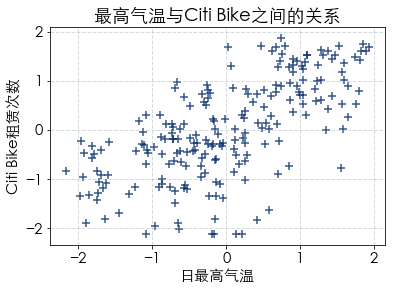

In [261]:
plt.rc('font',family = 'STXihei',size = 15)
plt.scatter(X_Standard,Y_Standard,60,color = '#052B6C',marker = '+',alpha = 0.8,linewidth = 1.5)
plt.xlabel('日最高气温')
plt.ylabel('Citi Bike租赁次数')
plt.title('最高气温与Citi Bike之间的关系')
plt.grid(color = '#95a5a6',linestyle ='--',linewidth = 1,axis = 'both',alpha = 0.4)
plt.show()

## 设置每日最高气温为自变量X，设置每日骑行数量为因变量Y

In [264]:
X = np.array(w['temp_max']).reshape(-1,1)
Y = np.array(cb_day[['Bike ID']]).reshape(-1,1)

## 导入线性回归库

In [250]:
from sklearn import linear_model

In [265]:
clf = linear_model.LinearRegression()
clf.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## 计算相关度

In [266]:
clf.score(X,Y)

0.42811564036434779

## 斜率

In [267]:
clf.coef_

array([[ 26.19377134]])

## 截距

In [268]:
clf.intercept_

array([ 279.20451123])

## 回归方程

Citi Bike租赁数量 = 26.19377 * 最高气温 + 279.2045

## 预测

In [269]:
clf.predict(19)

array([[ 776.88616667]])

In [270]:
clf.predict(39)

array([[ 1300.76159345]])

In [271]:
clf.predict(0)

array([[ 279.20451123]])

# 骑行速度与年龄是否存在关联

In [274]:
cb5['age'] = 2017 - cb5['birth year']

In [279]:
age_speed = cb5[['speed','age']]

In [280]:
age_speed.shape

(38682, 2)

In [281]:
age_speed = age_speed.dropna()  

In [282]:
age_speed.shape

(35828, 2)

## 年龄设为自变量,速度设为因变量

In [286]:
X = np.array(age_speed['age']).reshape(-1,1)

In [287]:
Y = np.array(age_speed['speed']).reshape(-1,1)

In [288]:
clf.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [289]:
clf.coef_

array([[-0.02674602]])

In [290]:
clf.intercept_

array([ 10.39378618])

In [291]:
clf.score(X,Y)

0.0053419661693026033

In [292]:
clf.predict(20)

array([[ 9.85886575]])

In [293]:
clf.predict(50)

array([[ 9.0564851]])

# 哪些骑行线路最受欢迎

## Top10最受欢迎租赁点

In [298]:
start_station = pd.pivot_table(cb5,index = ["start station name","start station latitude",
                                           "start station longitude"],
                               values = ['bikeid'],aggfunc = [len],fill_value =0,
                              margins = True).head(10)

In [299]:
start_station

,,,len
,,,bikeid
start station name,start station latitude,start station longitude,
5 Corners Library,40.734961,-74.059503,312.0
Astor Place,40.719282,-74.071262,203.0
Baldwin at Montgomery,40.723659,-74.064194,548.0
Bayside Park,40.698651,-74.082080,31.0
Bethune Center,40.704958,-74.085931,9.0
Brunswick & 6th,40.726012,-74.050389,803.0
Brunswick St,40.724176,-74.050656,1015.0
Central Ave,40.746730,-74.049251,233.0


In [301]:
end_station=pd.pivot_table(cb5,index=["start station name","start station latitude","start station longitude",
                                      "end station latitude","end station longitude","end station name"],
                           values=['bikeid'], aggfunc=[len],fill_value=0,margins=True).head(10)
end_station

len
                                                                                                                                     bikeid
start station name start station latitude start station longitude end station latitude end station longitude end station name              
5 Corners Library  40.734961              -74.059503              40.692640            -74.088012            Danforth Light Rail        1.0
                                                                  40.710109            -74.085849            NJCU                       1.0
                                                                  40.711130            -74.078885            MLK Light Rail             1.0
                                                                  40.711242            -74.055701            Liberty Light Rail         1.0
                                                                  40.712419            -74.038526            Morris Canal               9.0
                                                                  40.712774            -74.036486            Essex Light Rail           1.0
                                                                  40.713464            -74.062859            Lafayette Park             2.0
                                                                  40.714145            -74.033552            Paulus Hook                8.0
                                                                  40.714358            -74.066611            Communipaw & Berry Lane    1.0
                                                                  40.714584            -74.042817            Marin Light Rail           1.0

## 利用plotly可以画出路线